# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Geraldino, Simon Paul Andrew\
_Student No._: 2020-11068\
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Simon Paul Andrew M. Geraldino**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
!ls drive/My\ Drive

'00 Introduction.gslides'
'00 Introduction.pptx'
'04 Central Dogma.pdf'
'1 cm long Cu wire redox.drawio'
 202011068-22026904-PaymentSlip.pdf
 202011068.jpg
 20230705_165352.jpg
 88-2020-MERIT-Undergrad-Qualifier-Notification-Letter-GERALDINO.pdf
 Academics.gsheet
'ACCTG 1 QUIZ 1.gsheet'
'ACCTG 1 QUIZ 4.gsheet'
'ACCTG QUIZ 2.gsheet'
'ACCTG QUIZ 3.gsheet'
'acetic acid analysis.drawio'
'Activity 4_Summary Report_Stay At Ohm_Draft.gdoc'
 affiliation_df.csv
 affiliation_df.gsheet
'anion elim test.drawio'
'AP 155'
'AP155 - 20230926 - Module 1 - Integrals and Derivatives.gslides'
'AP155 - 20230926 - Module 1 - Integrals and Derivatives.pptx'
'AP 157'
'AP157 Course Guide AY 2023-2024 2nd Sem.pdf'
'AP157 Course Pack'
 apk
'Applied Physics 171.gsheet'
 Articles
'Assignment 1: Greetings (Script).gdoc'
'Assignments (3rd Quarter)'
'Assignments (4th Quarter)'
'author_df (1).gsheet'
'author_df (2).gsheet'
'author_df (3).gsheet'
 author_df.csv
 author_df.gsheet
'b20.simon.geraldino@pshs.edu.ph 2022-01

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/AP 157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [4]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [5]:
# Accesses the list of arrays in "data".
data.files

['spec_recons', 'wavelength']

In [6]:
# Checks the shape of the arrays.
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

In [19]:
"""
As part of data preprocessing, we would like to check what kind of data are we expect to see in the "spec_recons" and "wavelength" arrays.
"""

import pandas as pd

# Assigns the arrays to data frames.
df1 = pd.DataFrame(data['spec_recons'])
df2 = pd.DataFrame(data['wavelength'])

# Display the data frames.
display(df1)
display(df2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.920128,5.166237,6.073041,6.135668,5.920208,6.561038,5.071048,5.901859,6.038696,5.820622,...,8.393729,8.024036,8.561415,8.434849,8.597162,8.344885,8.907126,7.509330,7.970523,7.984391
1,2.189293,2.186866,2.184458,2.182061,2.866722,2.805367,2.174843,2.115526,2.204962,2.342030,...,13.340747,13.198367,13.232717,13.266667,13.090606,13.066720,12.839167,12.837092,12.934673,12.810533
2,2.745135,2.738469,3.368032,3.217042,3.441880,3.687229,2.793172,3.174353,3.186890,3.210912,...,10.021246,9.908648,9.955985,10.244089,9.782692,11.257375,8.749062,9.290792,9.108875,8.385379
3,3.157695,3.394861,4.296070,3.674411,4.581087,4.633624,3.451835,3.545794,3.726416,3.915776,...,22.398006,21.411480,21.953152,21.155659,21.920168,21.504097,19.942957,20.881233,20.432819,19.751265
4,1.456530,1.511022,2.063326,1.585510,2.108591,2.171321,1.534262,1.612093,1.783922,1.866496,...,10.302826,10.195320,10.219833,10.287531,10.136375,10.049644,9.778271,10.630739,9.073994,9.437379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.566501,0.806633,1.078575,1.142745,1.408041,1.539500,0.789904,0.779375,0.790446,1.021665,...,6.021113,6.180089,5.779444,5.468583,6.208807,5.352884,6.046436,5.509343,5.549700,5.588080
3996,1.516849,3.168352,2.308541,3.285917,2.652673,0.969830,2.547793,2.168796,3.537405,2.347333,...,6.803461,6.717976,6.740576,6.766204,6.655971,6.661380,6.524184,6.522043,6.557480,6.498815
3997,1.772032,2.030068,2.236027,2.156615,2.340729,2.315020,1.979210,1.944517,2.108420,2.068026,...,5.770639,5.833852,5.883630,5.887005,5.761838,5.827677,6.377102,4.777608,7.063931,5.797799
3998,4.498378,5.072573,5.667263,5.853247,6.204665,6.194448,5.075573,5.194005,5.122931,5.267116,...,20.002645,20.556625,21.015553,20.358269,20.290157,20.935774,21.802231,21.518795,19.828224,20.714499


,0
0,3162.277660
1,3165.191567
2,3168.108159
3,3171.027439
4,3173.949409
...,...
995,7906.786280
996,7914.072054
997,7921.364542
998,7928.663749


Let's plot the first few spectra to visualize our data

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

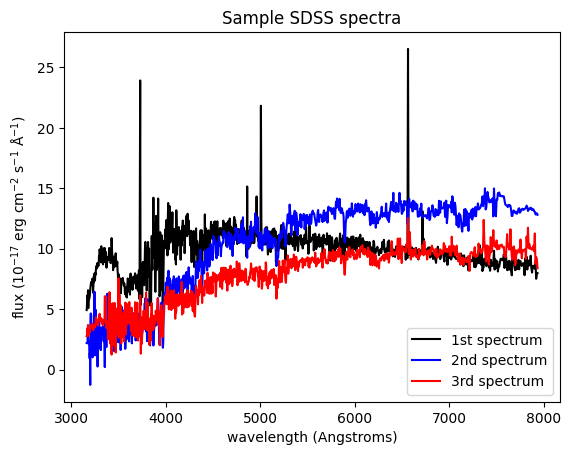

In [27]:
## Prepares the Sample SDSS spectra

# Assigns the "wavelength" array into the "wavelength" variable.
wavelength = data['wavelength']

# Pulls the data from the 0th row of the array.
flux0 = data['spec_recons'][0,:]

# Pulls the data from the 1st row of the array.
flux1 = data['spec_recons'][1,:]

# Pulls the data from the 2nd row of the array.
flux2 = data['spec_recons'][2,:]

# Plots the relationship between the wavelength and the flux.
plt.plot(wavelength, flux0, 'k-', label = "1st spectrum")
plt.plot(wavelength, flux1, 'b-', label = "2nd spectrum")
plt.plot(wavelength, flux2, 'r-', label = "3rd spectrum")
plt.legend()
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

# Shows the plot.
plt.show()

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


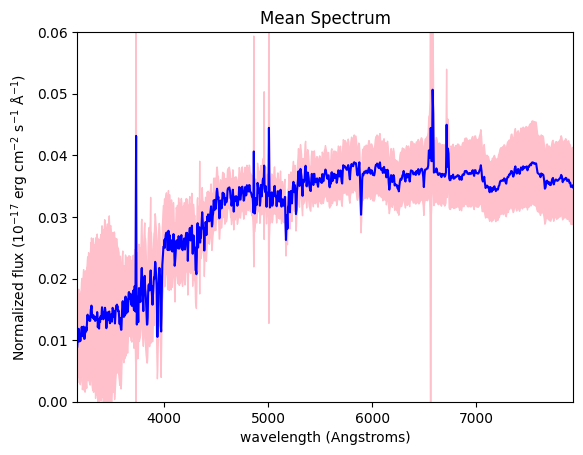

In [38]:
import pylab as pl
from sklearn import preprocessing

## Creates the mean normalized spectrum

# Assigns the "spec_recons" array into the "flux" variable.
flux = data['spec_recons']

# Normalizes the samples found in "flux".
X = preprocessing.normalize(flux)

# Computes the mean.
mu = X.mean(0)

# Computes the standard deviation.
std = X.std(0)

# Plots the relationship between wavelength and the normalized mean.
pl.plot(wavelength, mu, color='blue')
pl.fill_between(wavelength, mu - std, mu + std, color='#ffc0cb')
pl.xlim(wavelength[0], wavelength[-1])
pl.ylim(0, 0.06)
pl.xlabel('wavelength (Angstroms)')
pl.ylabel('Normalized flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)')
pl.title('Mean Spectrum')

# Shows the plot.
pl.show()

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [40]:
from sklearn.decomposition import PCA

## Limits the dimensionality of the components to 4.

# Gets the 4 principle components.
pca = PCA(n_components=4)

# Fits the "pca" model and transforms the "X" array.
X_proj = pca.fit_transform(X)

# Checks the shape of the "X_proj" array.
X_proj.shape

(4000, 4)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

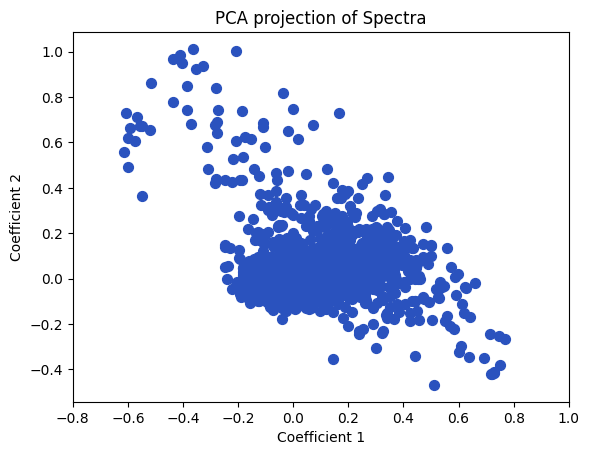

In [46]:
# Plots the first two principal components.
pl.figure()
pl.scatter(X_proj[:, 0], X_proj[:, 1], c='#2a52be', s=50)
pl.xlabel('Coefficient 1')
pl.ylabel('Coefficient 2')
pl.title('PCA projection of Spectra')
pl.xlim(-0.8,1)

pl.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

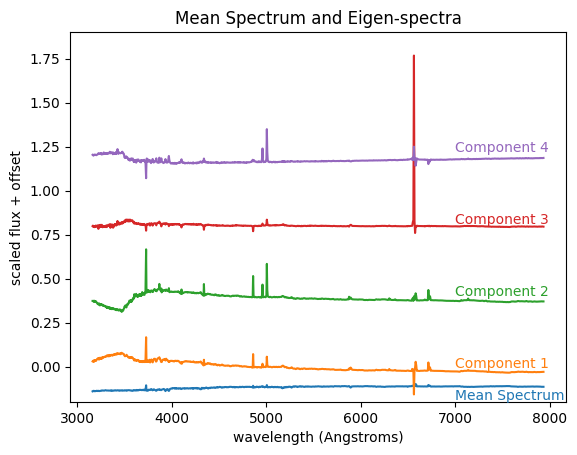

In [69]:
# Plots the first 4 spectra, together with the mean spectrum.
pl.figure()
l = pl.plot(wavelength, pca.mean_ - 0.15)
c = l[0].get_color()
pl.text(7000, -0.19, 'Mean Spectrum', color=c)


# This for loop creates the spectra, with an arbitrary y-offset between them.
for i in range(4):
    l = pl.plot(wavelength, pca.components_[i] + 0.40 * i)
    c = l[0].get_color()
    pl.text(7000, -0.01 + 0.41 * i, "Component %i" % (i + 1), color=c)
pl.ylim(-0.2, 1.9)
pl.xlabel('wavelength (Angstroms)')
pl.ylabel('scaled flux + offset')
pl.title('Mean Spectrum and Eigen-spectra')

# Shows the plot
pl.show()